## Importing Libraries

In [4]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [5]:
df=pd.read_csv("Data/DDoS.csv")

In [6]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [8]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [10]:
#Unique values in the Label target column

df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

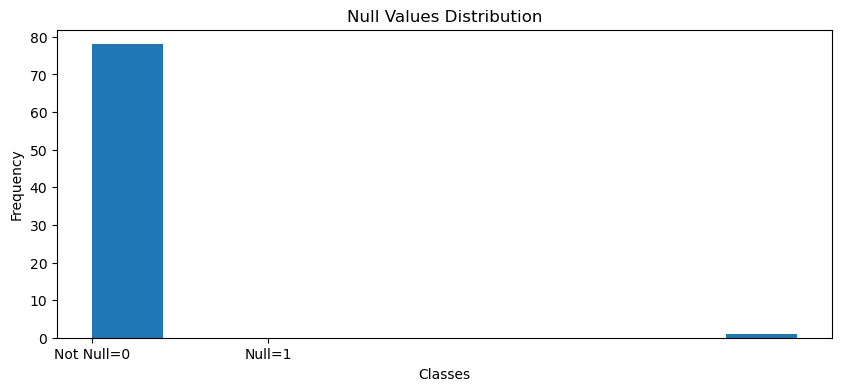

In [11]:
def pltNullDistribution(df):
    
    #Checking the null values in the dataset.
    plt.figure(1, figsize = (10,4))
    plt.hist(df.isna().sum())
    
    # Set the title and axis labels
    plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
    plt.title('Null Values Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()
    
pltNullDistribution(df)

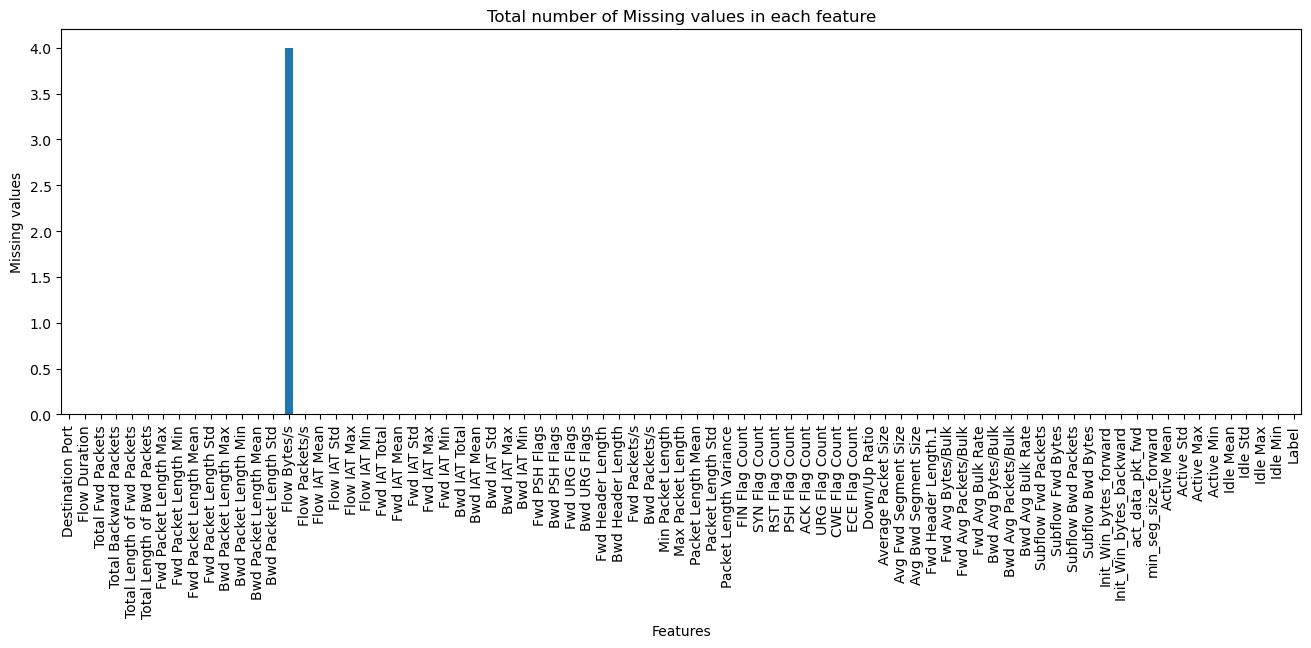

In [12]:
def plotMissingValues(df):
    missing_values = df.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

The `df.dropna()` method in pandas is used to **remove missing values** (i.e., NaN or None) from a DataFrame. This method can be customized with various parameters to control which rows or columns are removed based on the presence of missing values.

In [13]:
data=df.dropna()

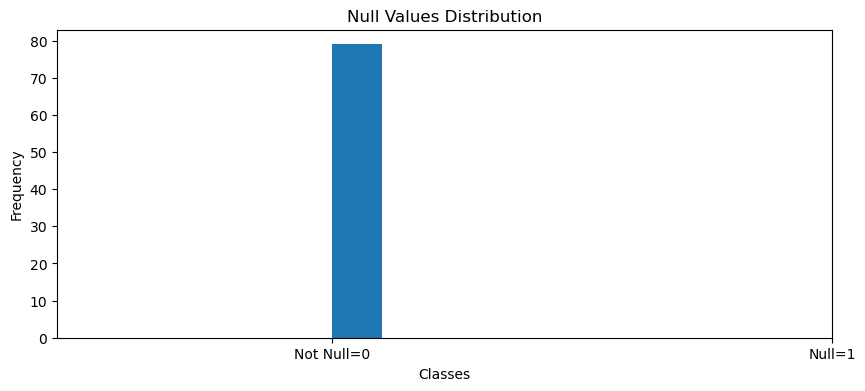

In [14]:
pltNullDistribution(data)

In [15]:
data.loc[:, :] = data.replace([np.inf, -np.inf], np.nan)


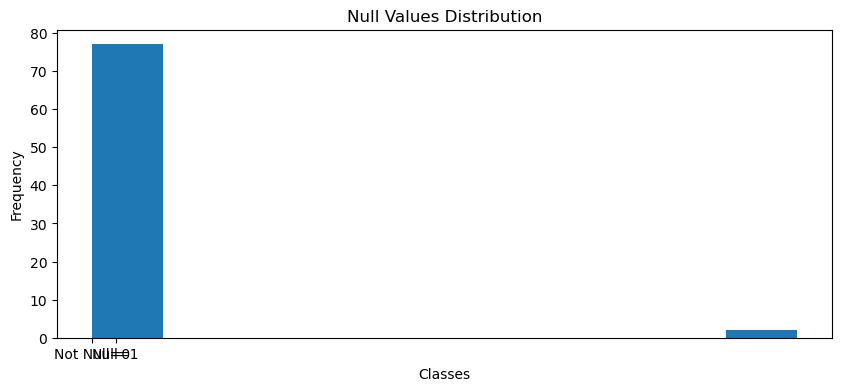

In [16]:
pltNullDistribution(data)

In [17]:
data.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Length: 79, dtype: object

In [18]:
for col in data.columns:
    print(data[col].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
int64
float64
float64
float64
float64
float64
float64
int64
int64
int64
float64
float64
int64
int64
int64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
int64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
int64
float64
float64
int64
int64
object


In [19]:
data['Label'] = data['Label'].map({'BENIGN': 0, 'DDoS': 1})

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16200\816821436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].map({'BENIGN': 0, 'DDoS': 1})


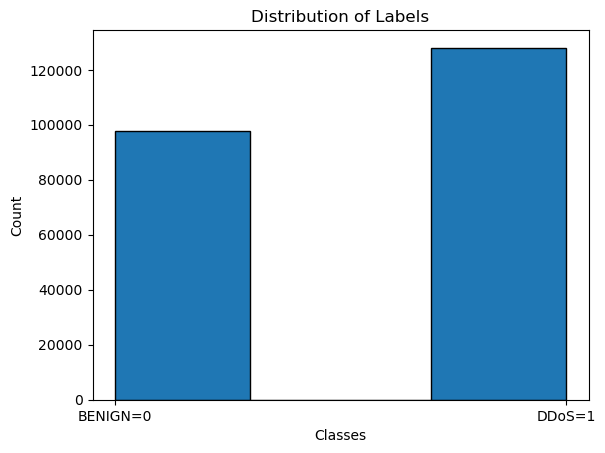

In [22]:
plt.hist(data['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.title('Distribution of Labels')
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [23]:
data.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                            int64
Length: 79, dtype: object

In [24]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


## Data Exploring

In [25]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225741.000000,2.257410e+05,225741.000000,225741.000000,225741.000000,2.257410e+05,225741.000000,225741.000000,225741.000000,225741.000000,...,225741.000000,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,2.257410e+05,225741.000000
mean,8879.294213,1.624194e+07,4.874972,4.572851,939.479993,5.960583e+03,538.545235,27.882715,164.829636,214.911050,...,21.482513,1.848294e+05,1.293459e+04,2.080886e+05,1.776232e+05,1.032233e+07,3.612007e+06,1.287836e+07,7.755493e+06,0.567141
std,19754.491905,3.152458e+07,15.423004,21.755541,3249.429866,3.921868e+04,1864.144128,163.325564,504.896961,797.417625,...,4.166390,7.979317e+05,2.102755e+05,9.002425e+05,7.842668e+05,2.185318e+07,1.275700e+07,2.692145e+07,1.983124e+07,0.495473
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.000000,7.118300e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.000000,1.452362e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.000000,8.805245e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239754e+06,0.000000e+00,8.253869e+06,7.422871e+06,1.000000
max,65532.000000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


### plot distribution

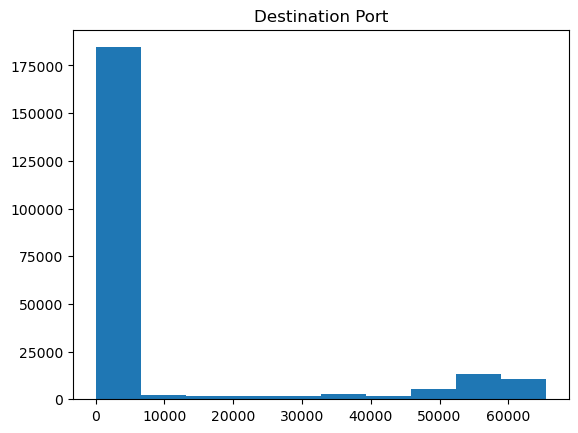

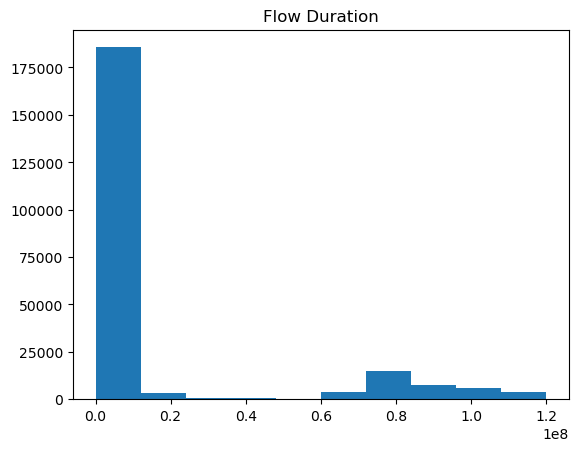

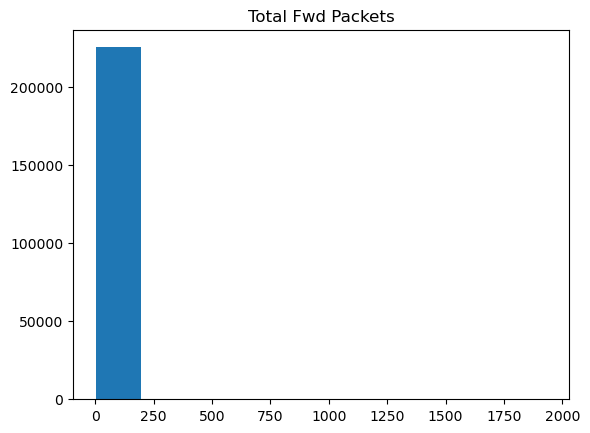

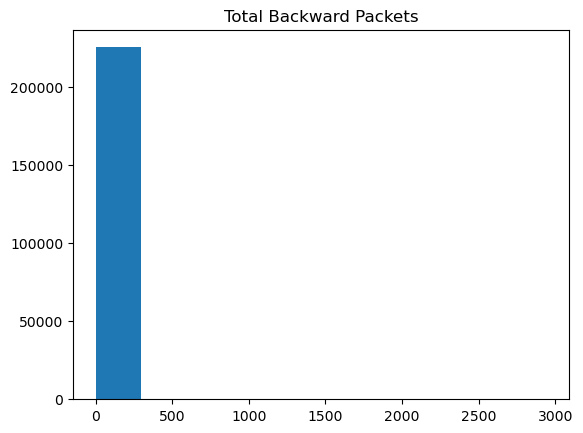

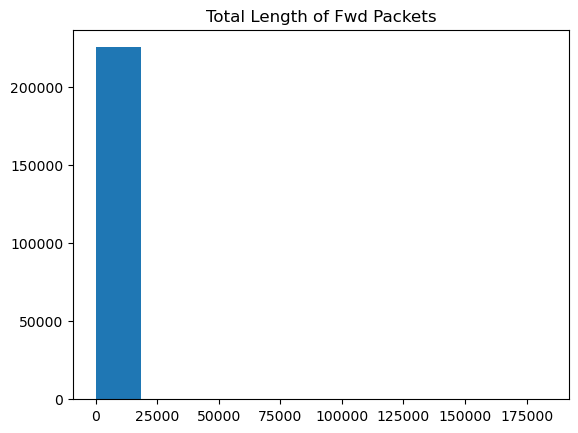

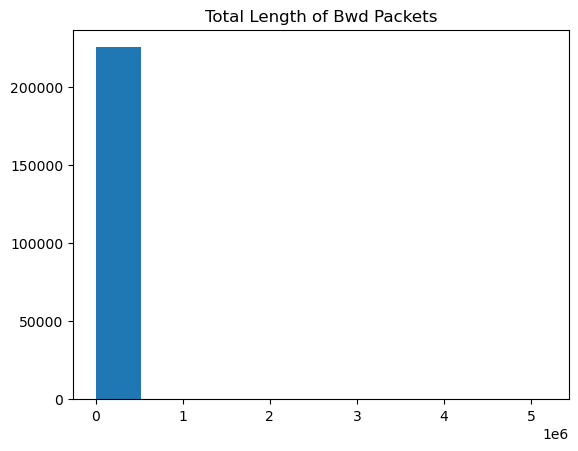

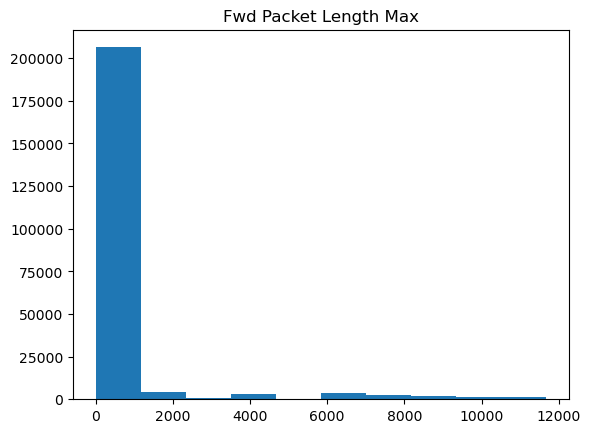

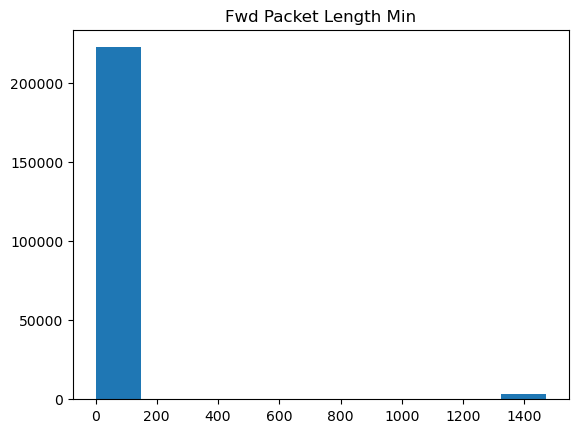

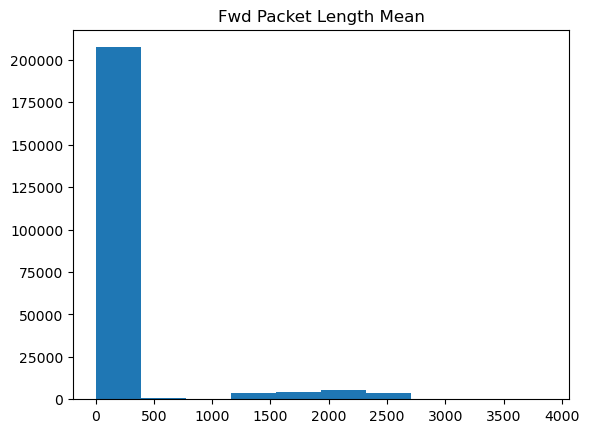

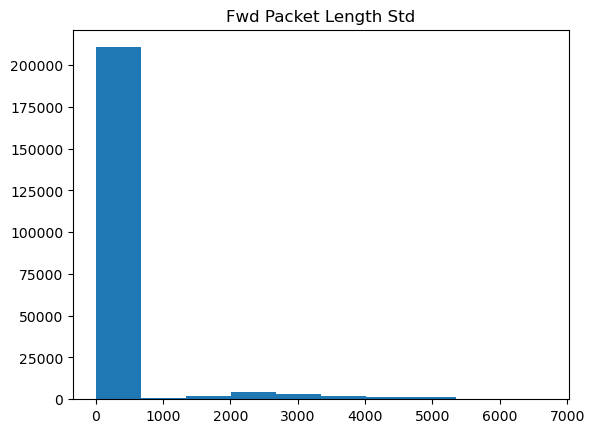

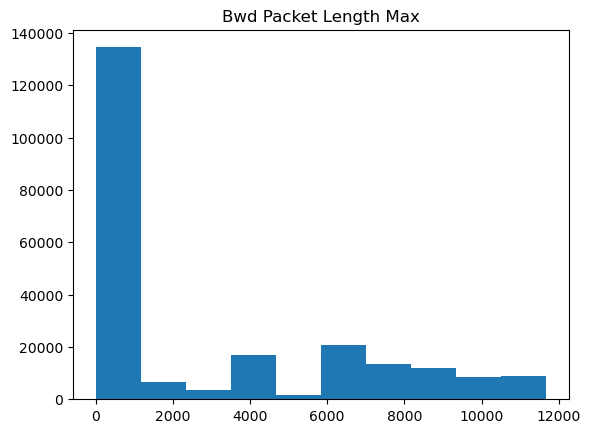

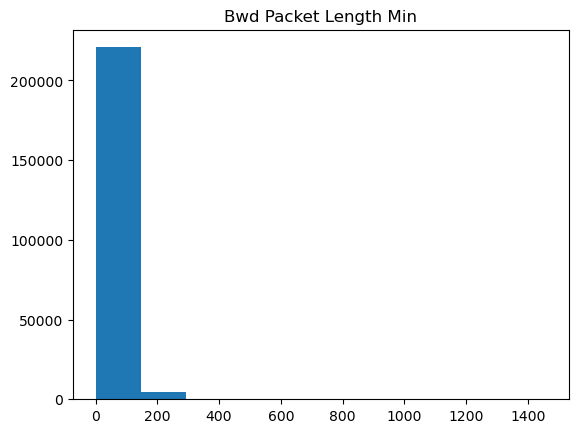

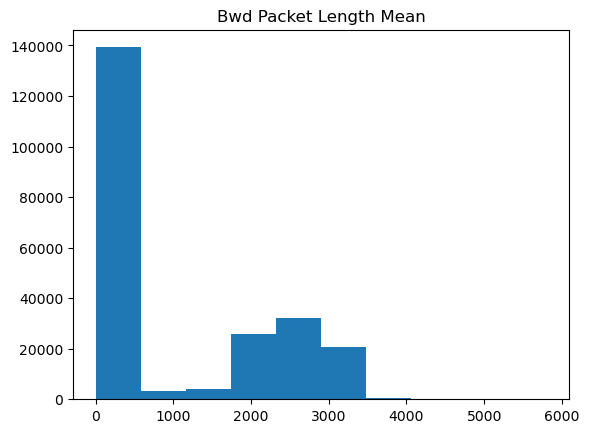

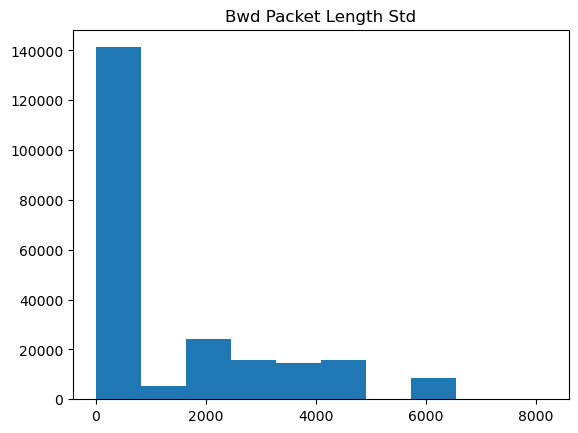

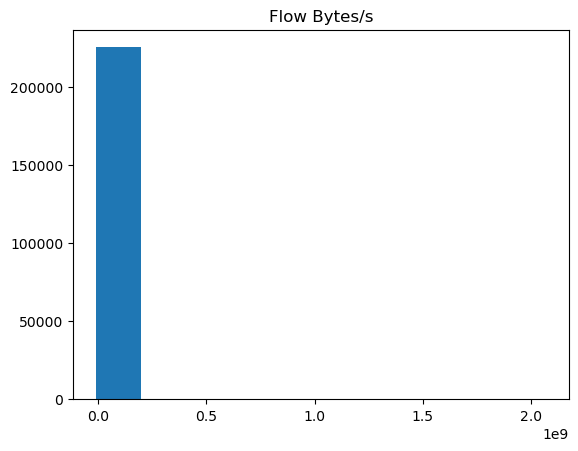

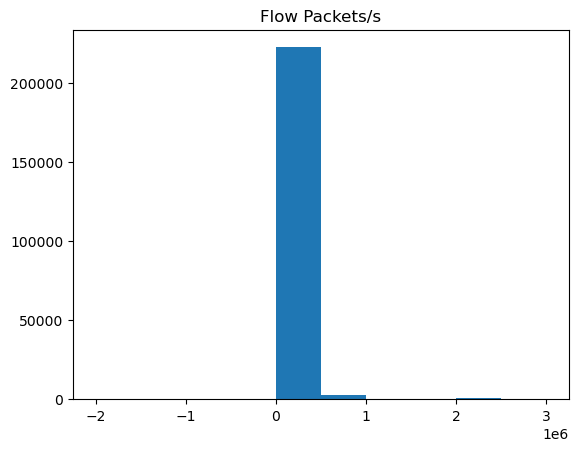

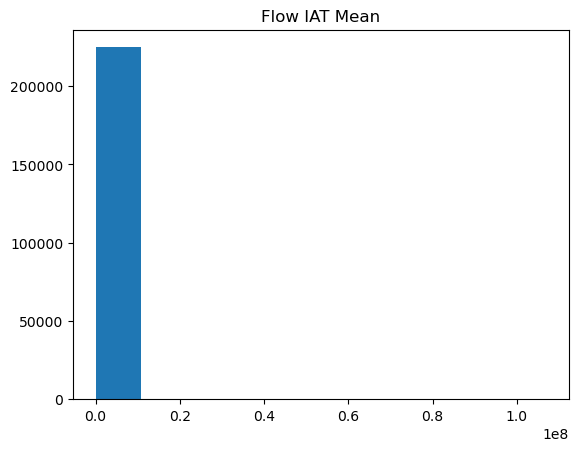

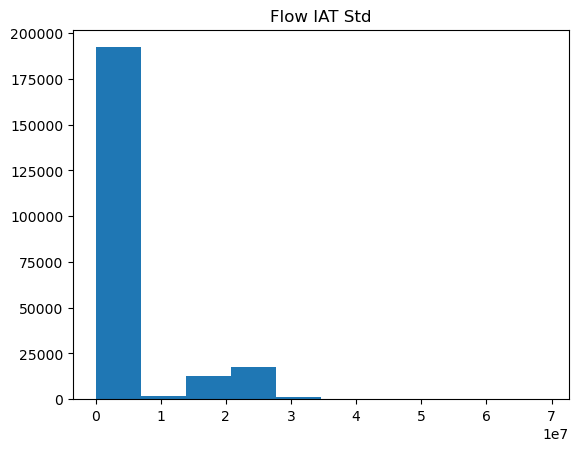

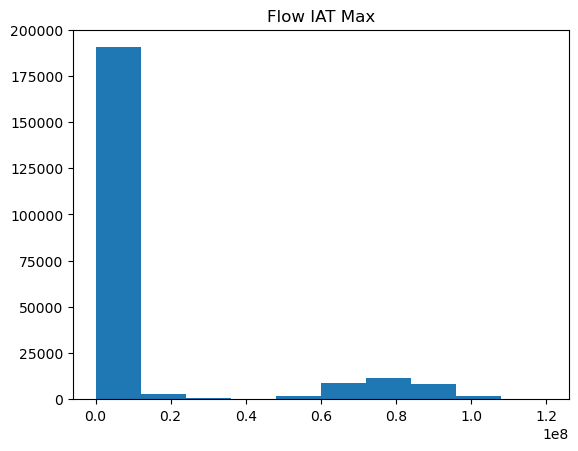

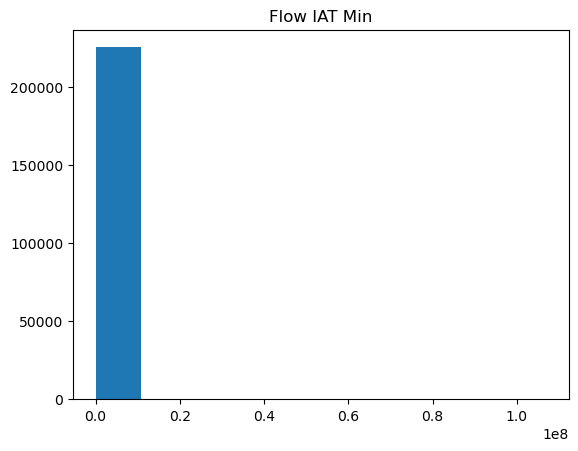

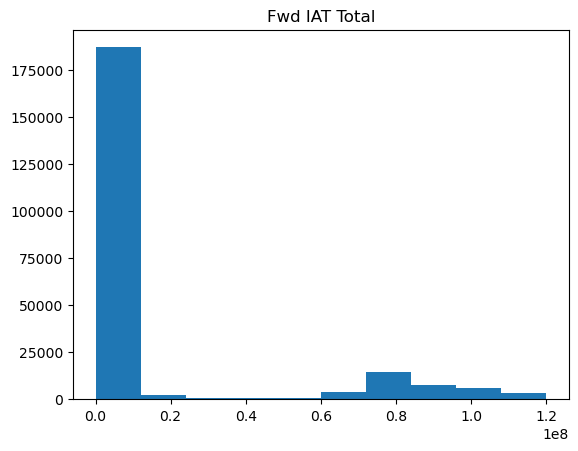

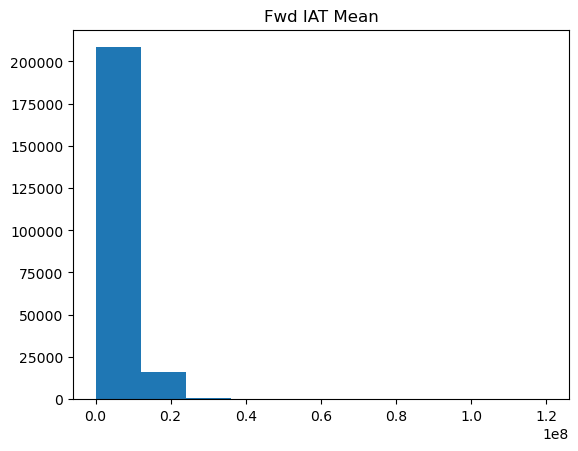

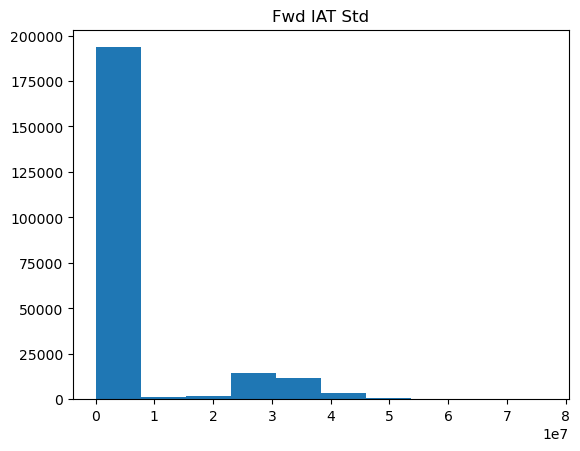

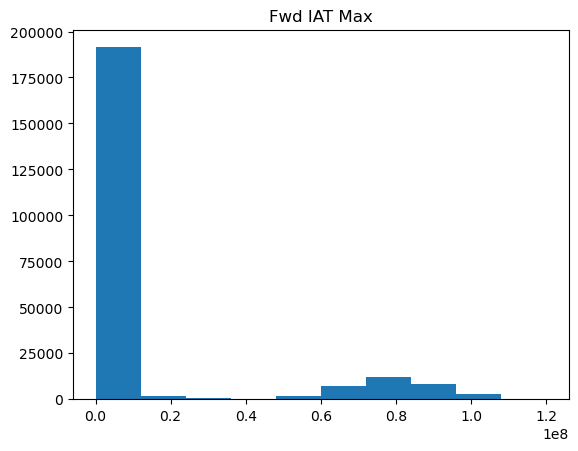

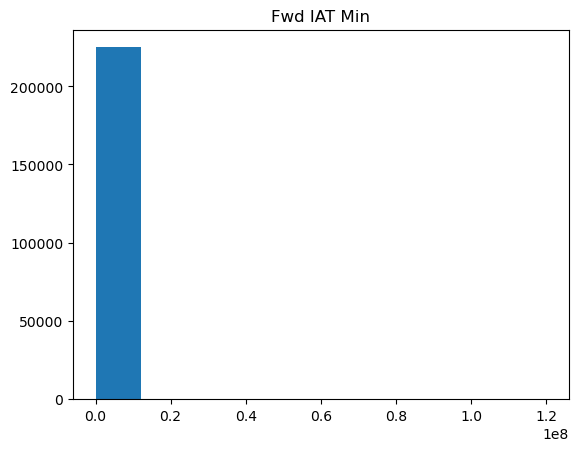

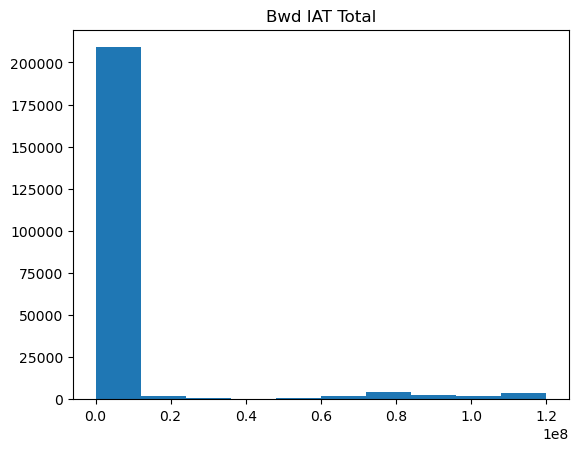

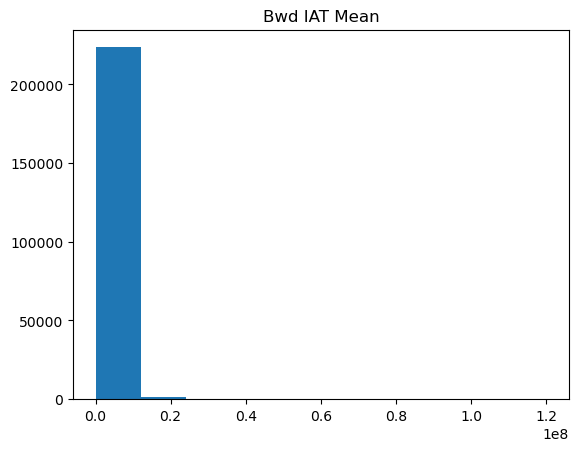

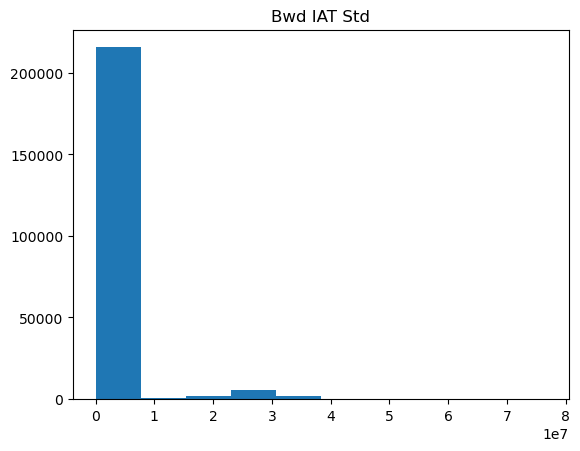

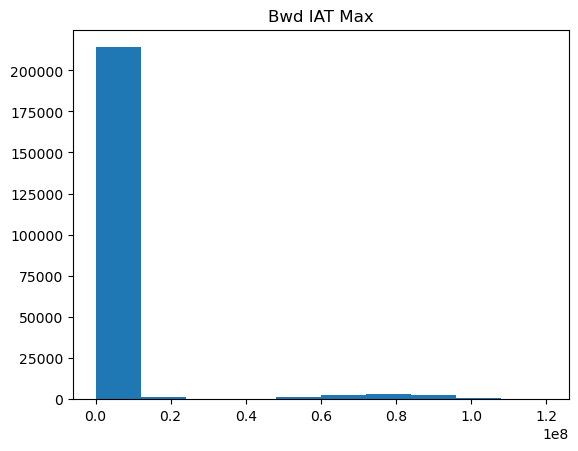

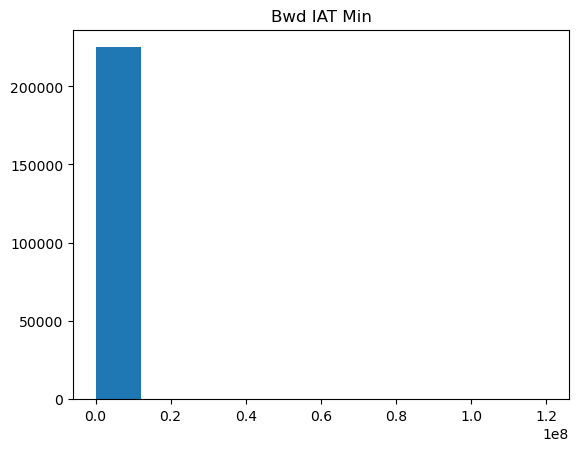

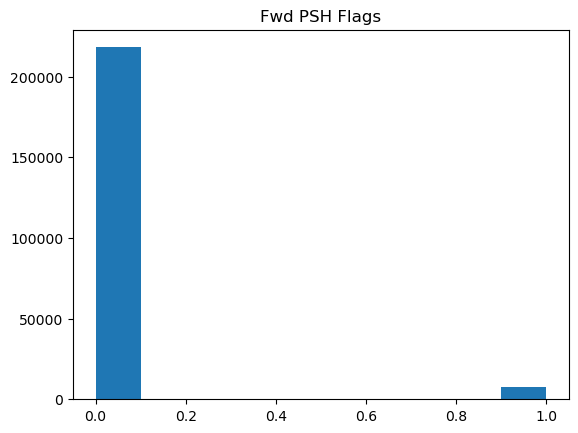

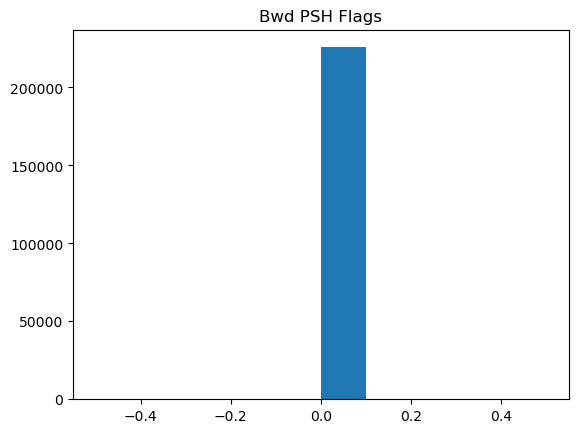

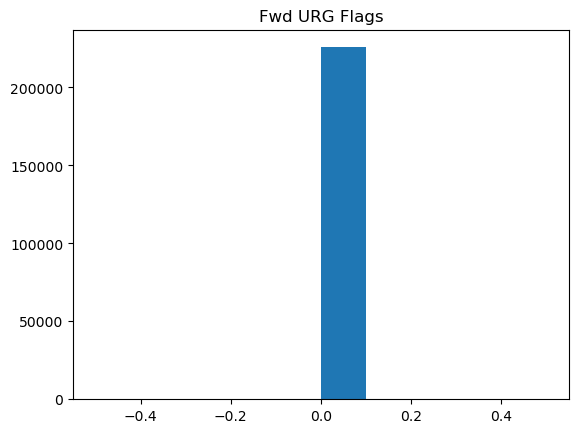

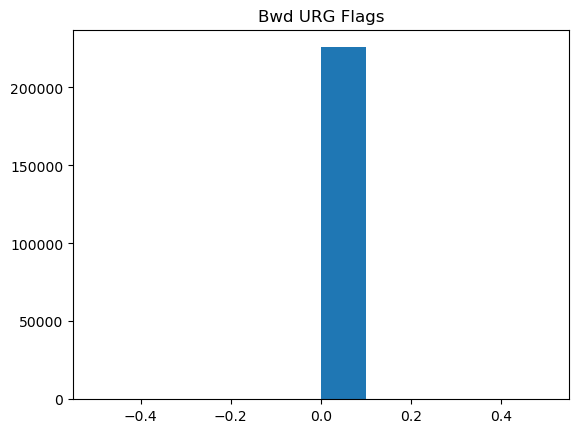

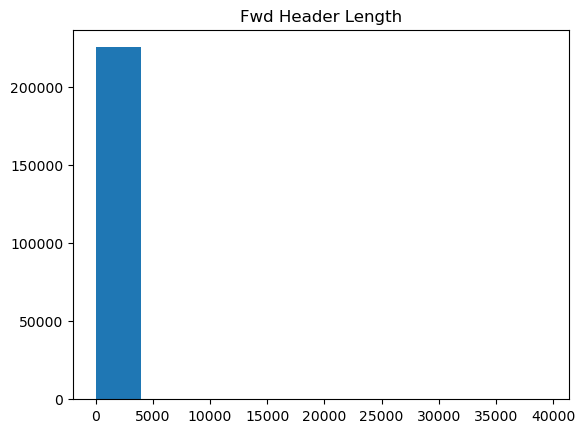

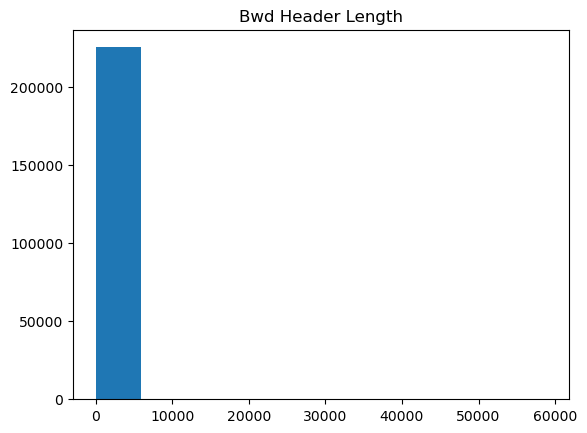

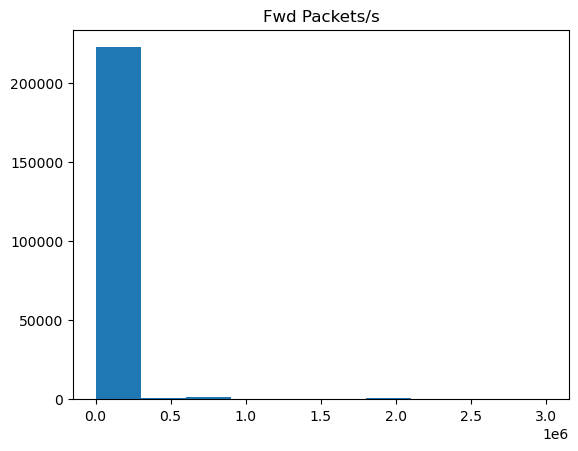

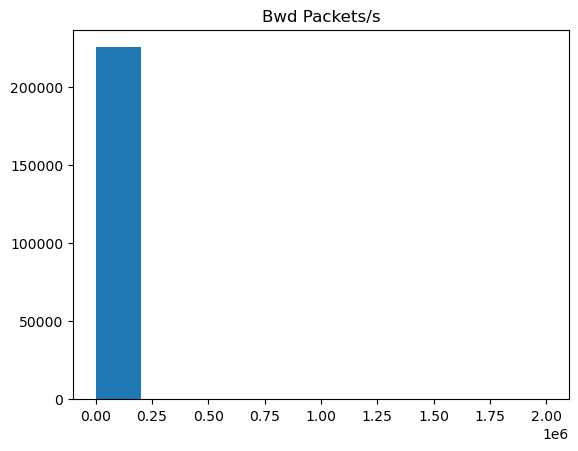

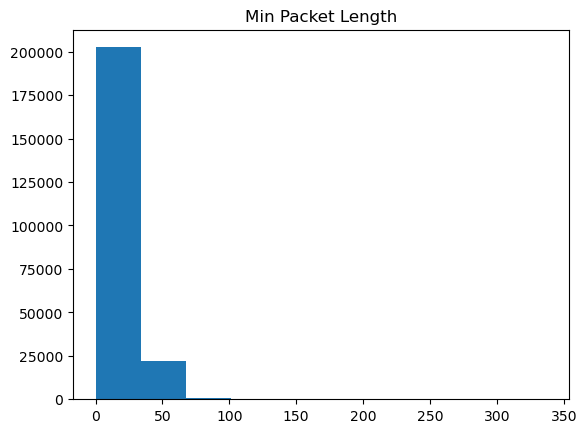

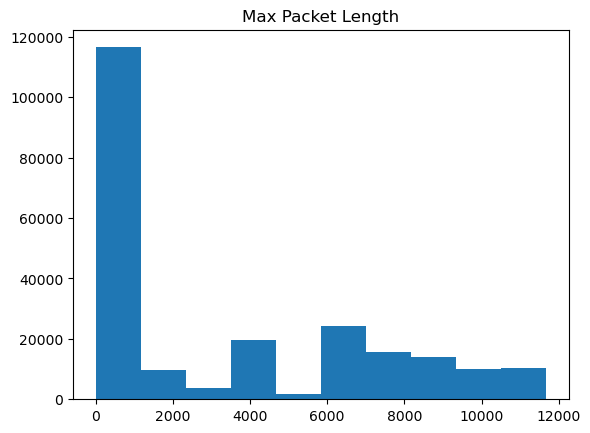

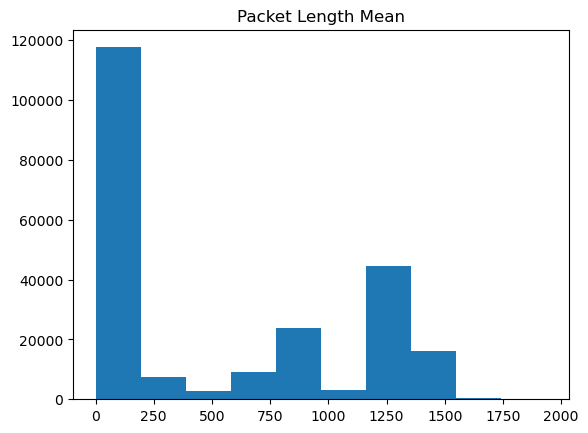

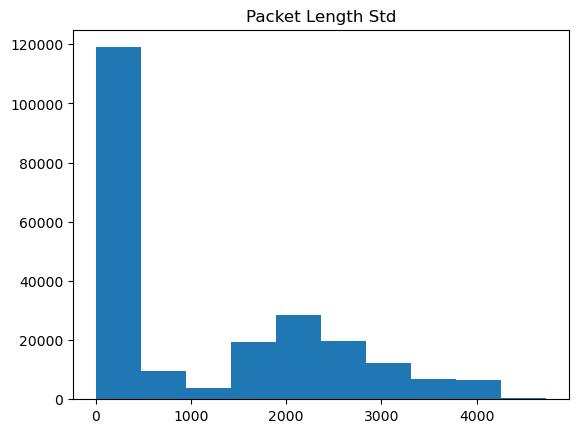

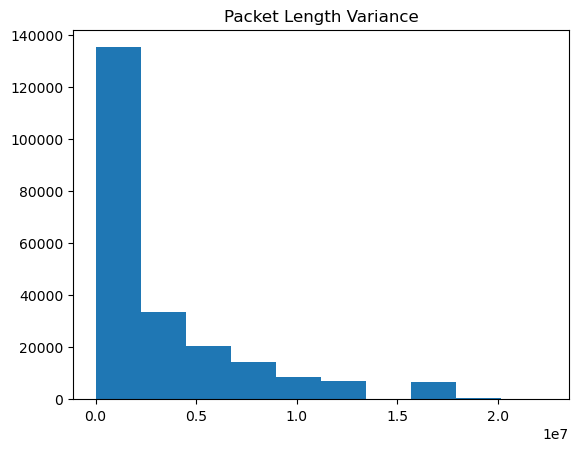

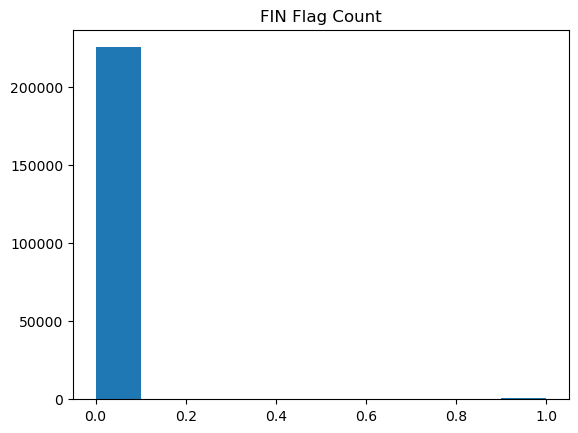

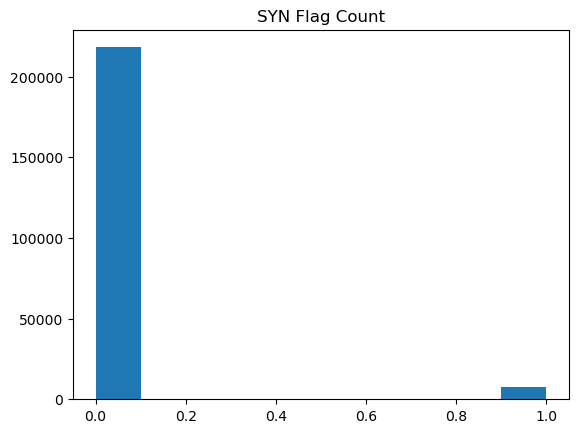

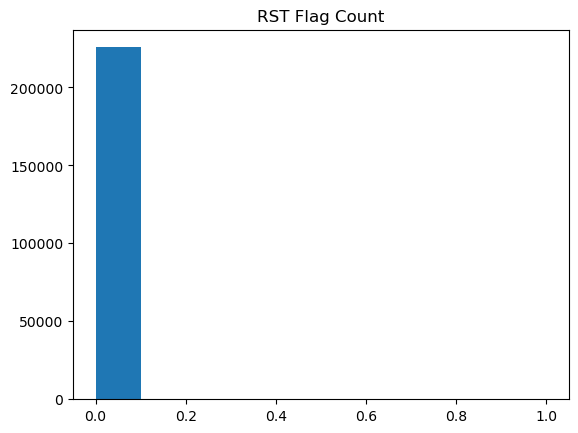

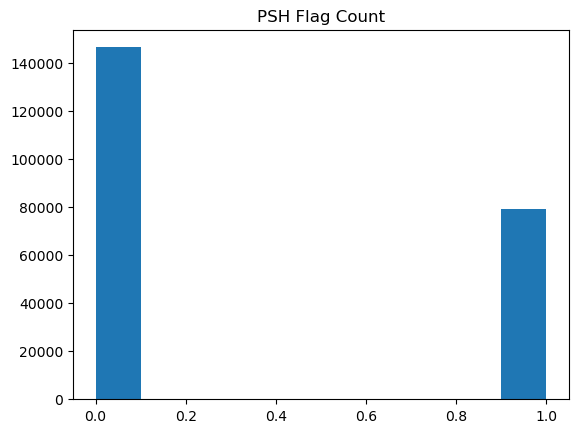

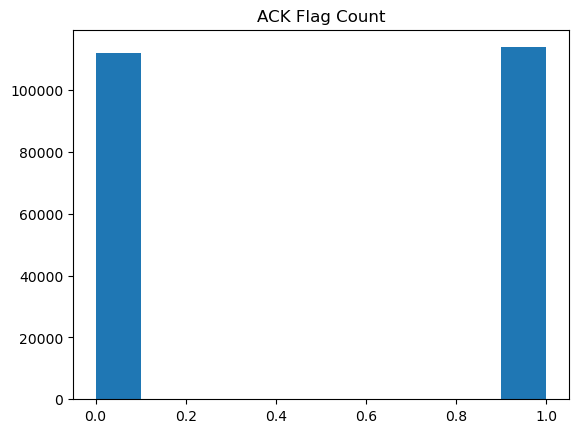

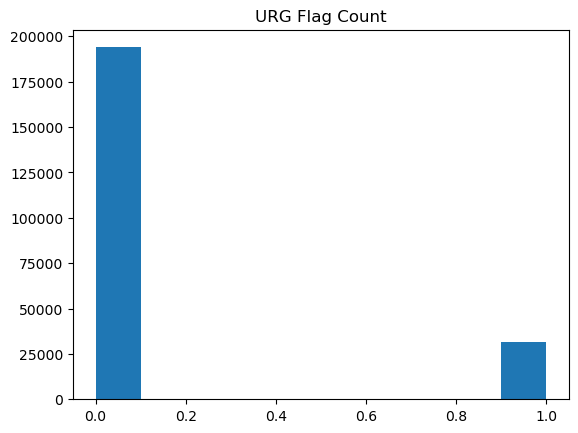

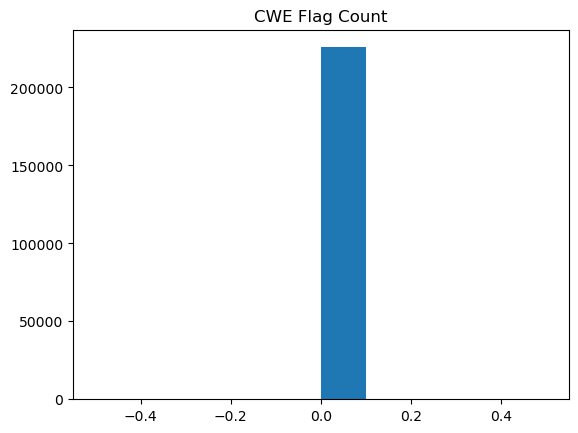

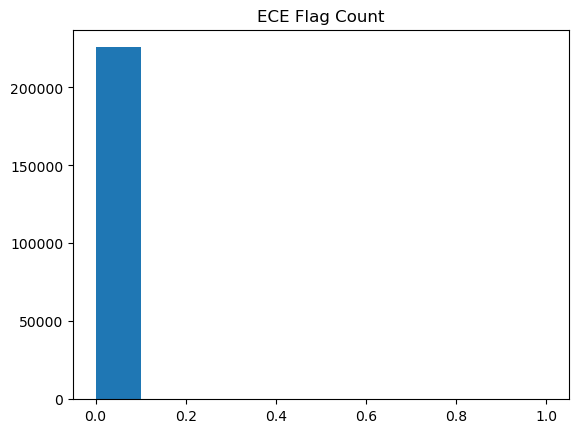

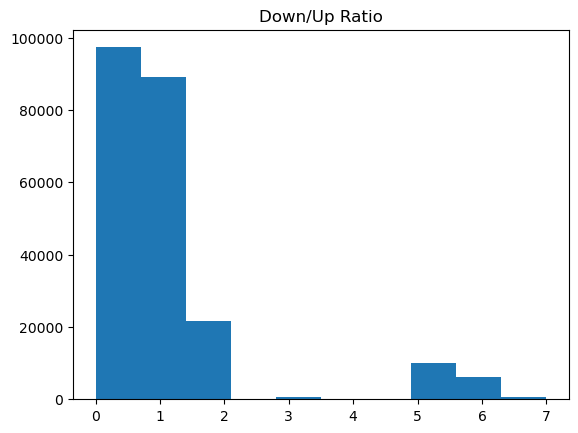

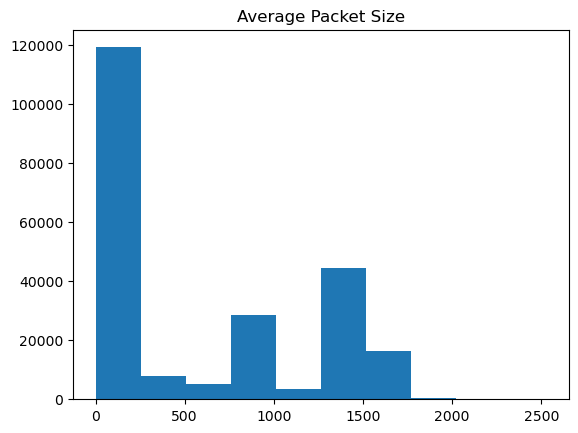

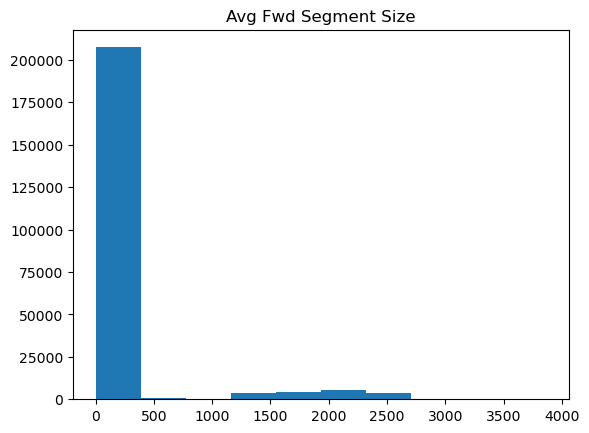

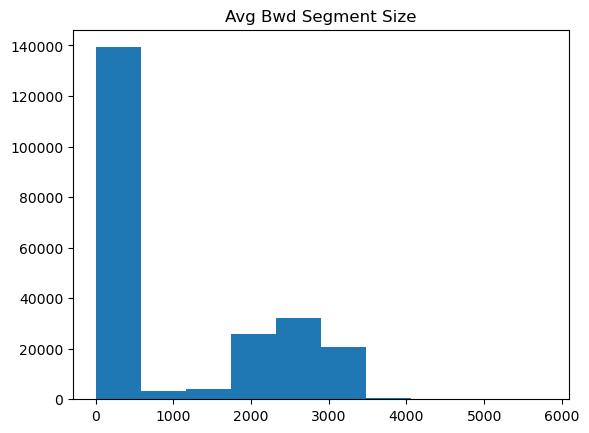

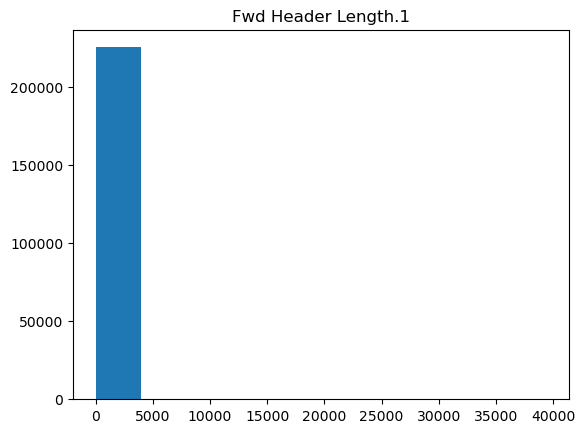

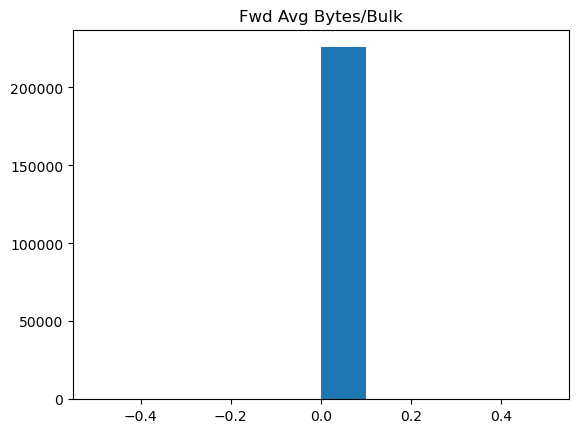

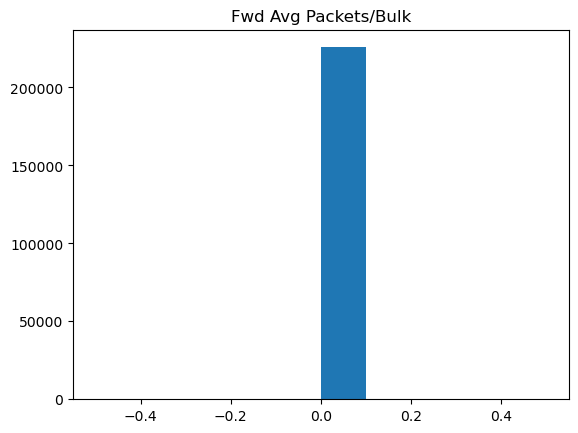

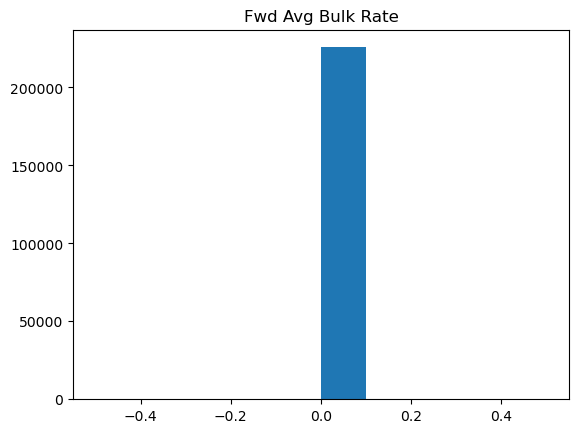

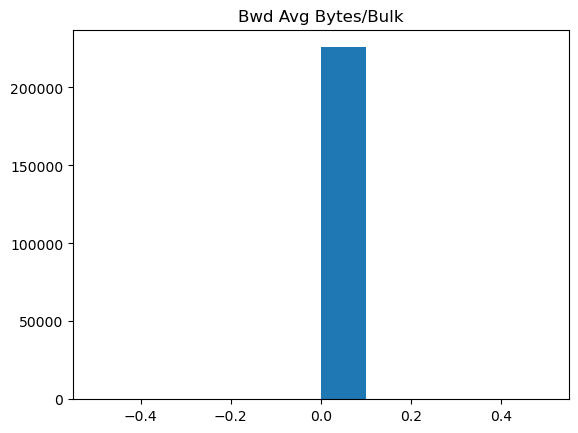

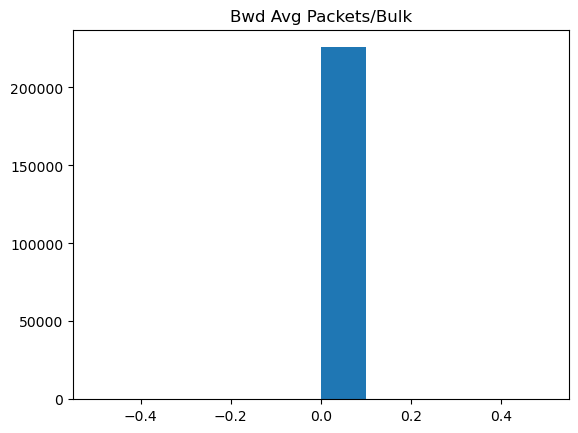

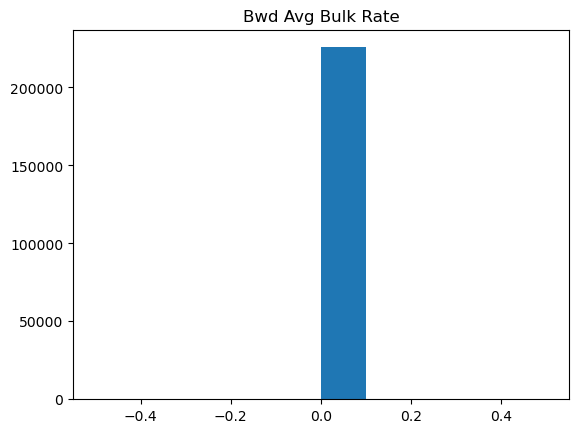

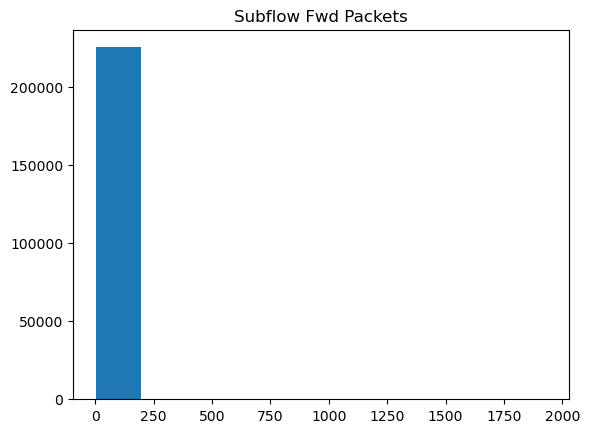

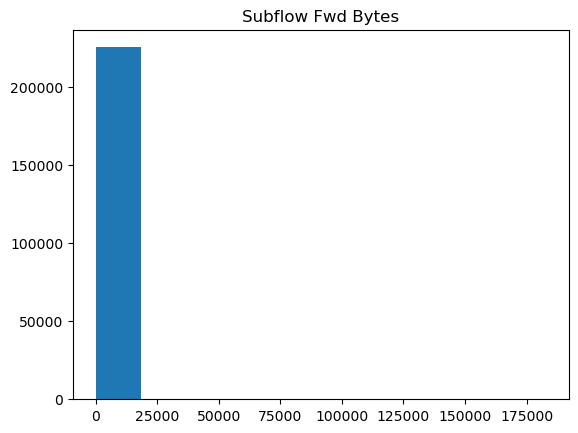

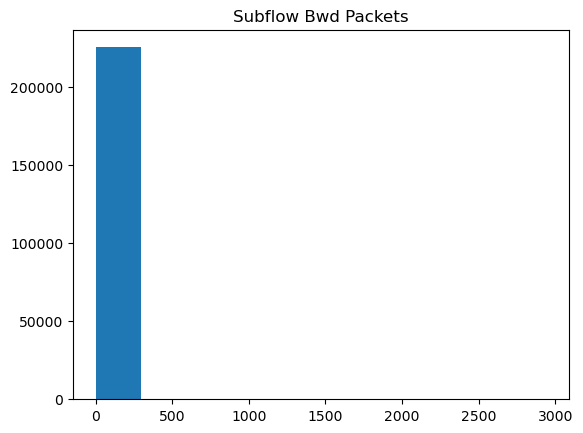

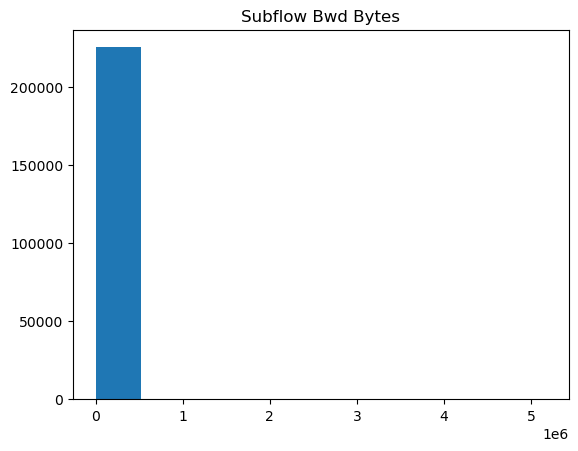

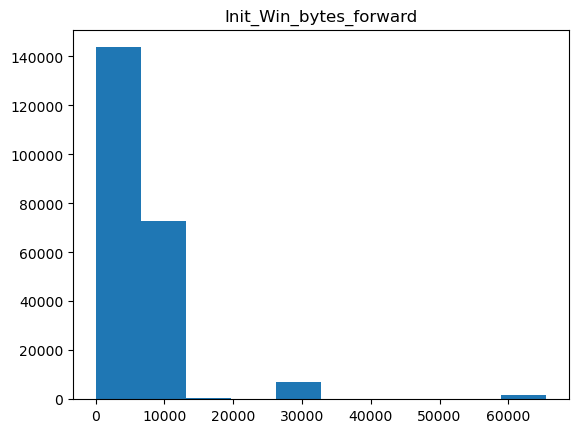

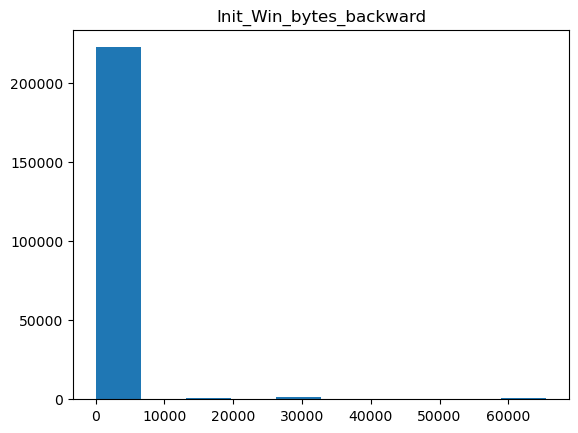

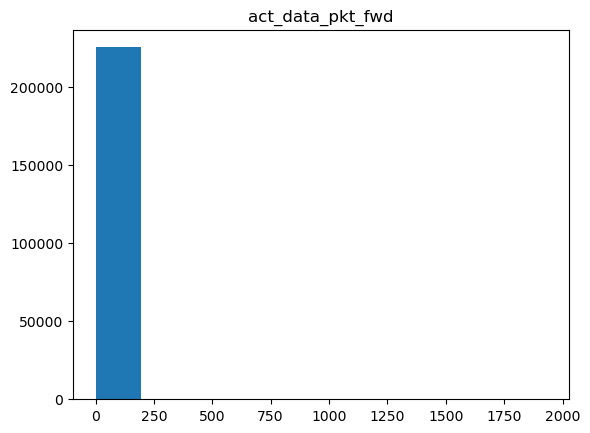

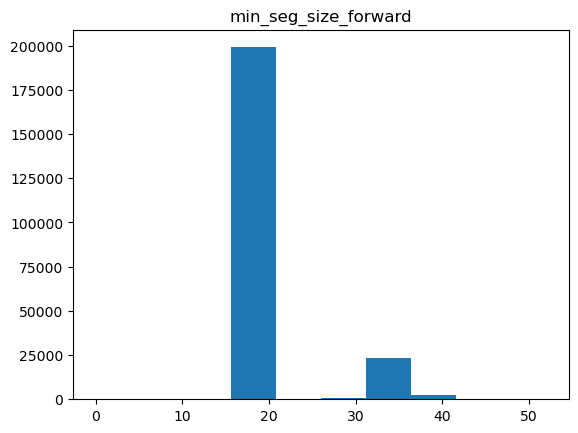

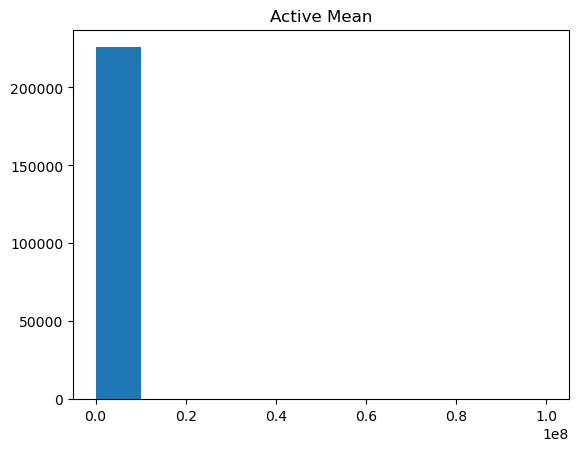

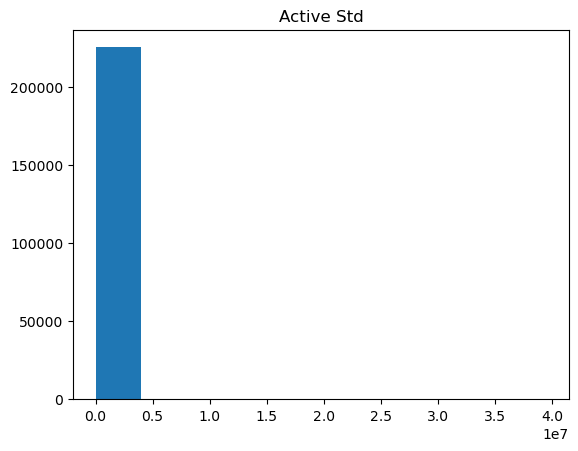

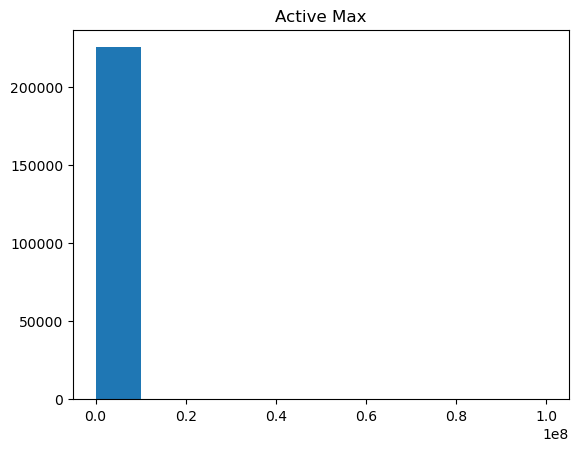

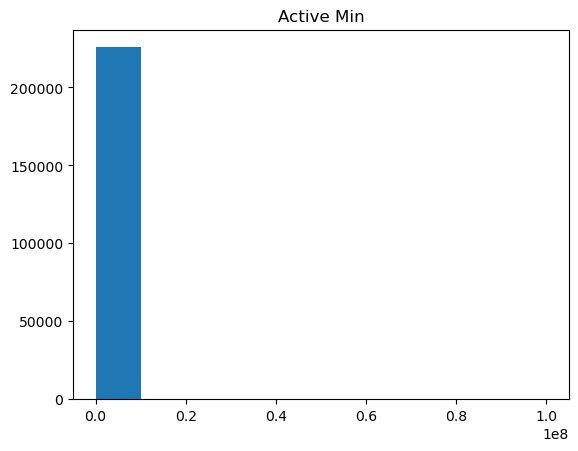

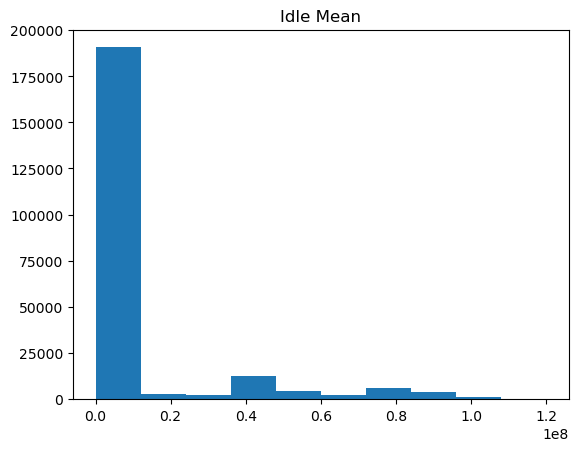

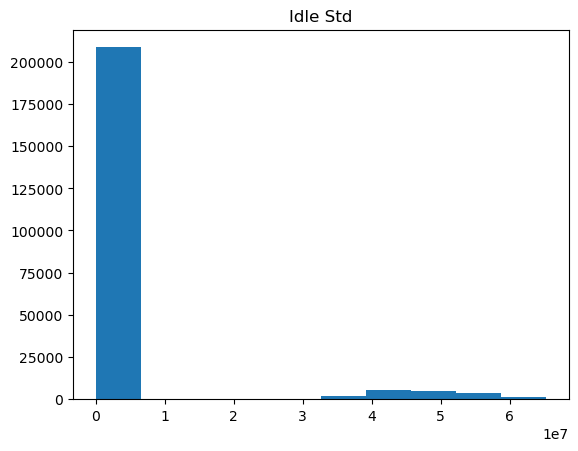

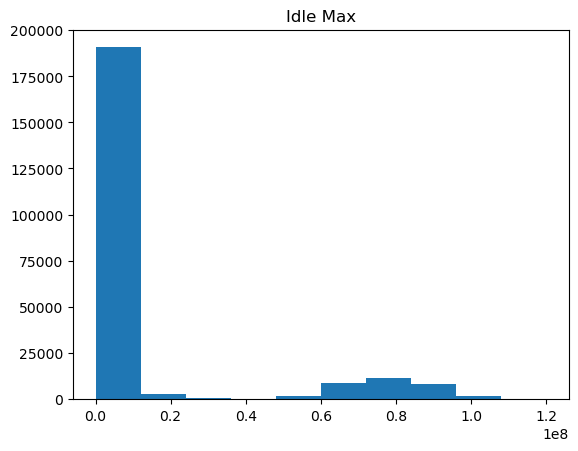

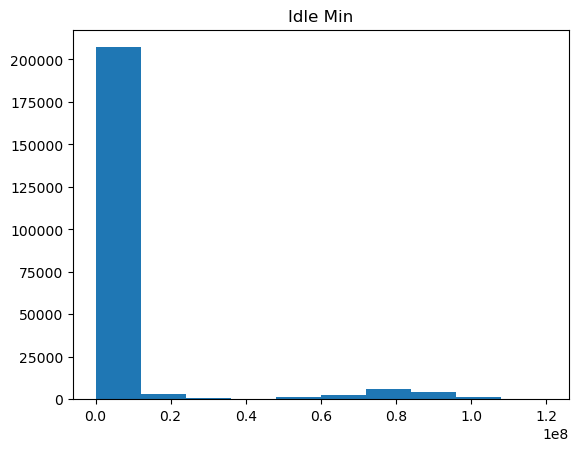

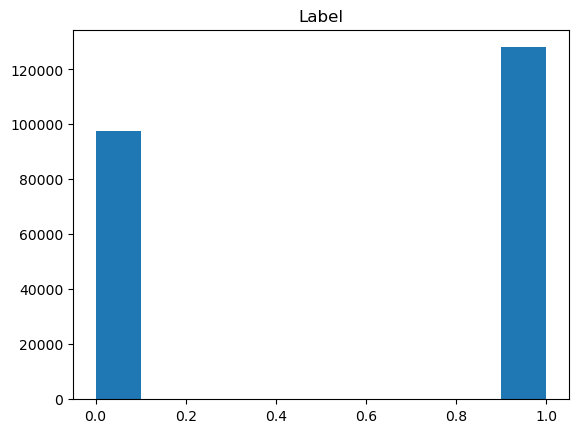

In [26]:
plt.figure(5)

for col in data.columns:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

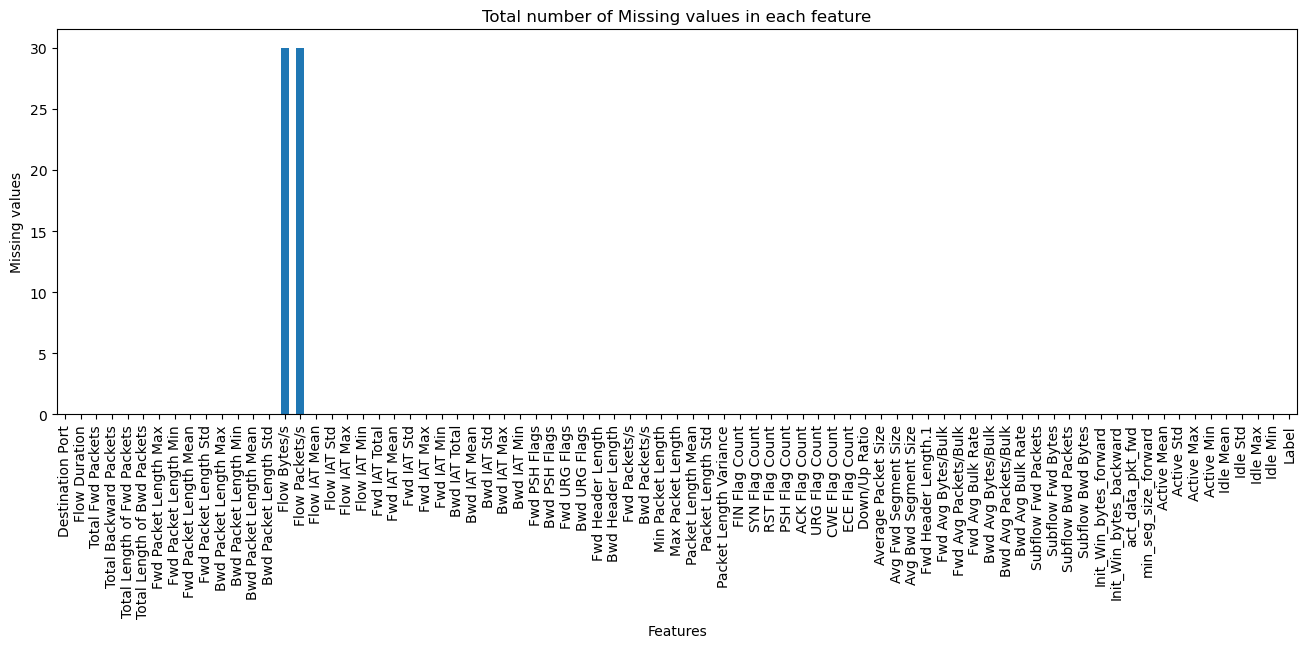

In [27]:
plotMissingValues(data)

In [28]:
data = data.dropna()


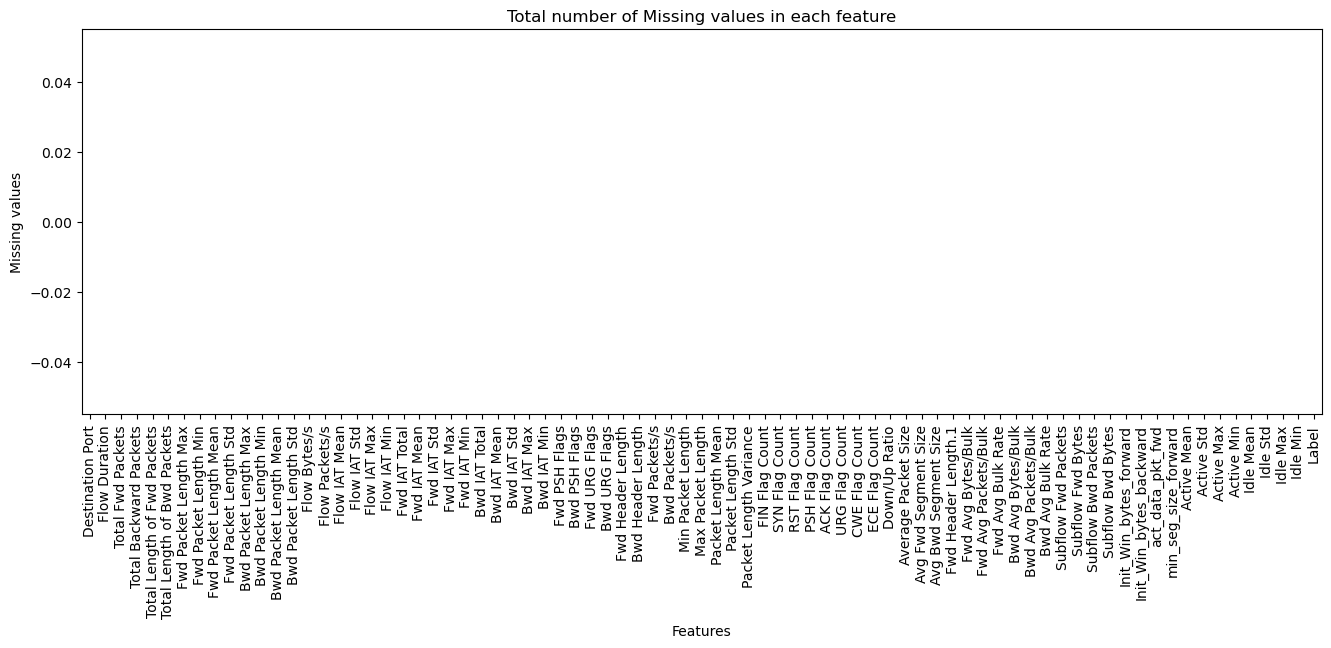

In [29]:
plotMissingValues(data)

## Test and Train Split

In [30]:
X = data.drop('Label', axis=1)
y = data['Label']

In [31]:
print(X.shape)
print(y.shape)


(225711, 78)
(225711,)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [34]:
print(X_train.shape)
print(X_test.shape)


(203139, 78)
(22572, 78)


## Training the Model

In [35]:
# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [36]:
# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

## Random Forest

In [37]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

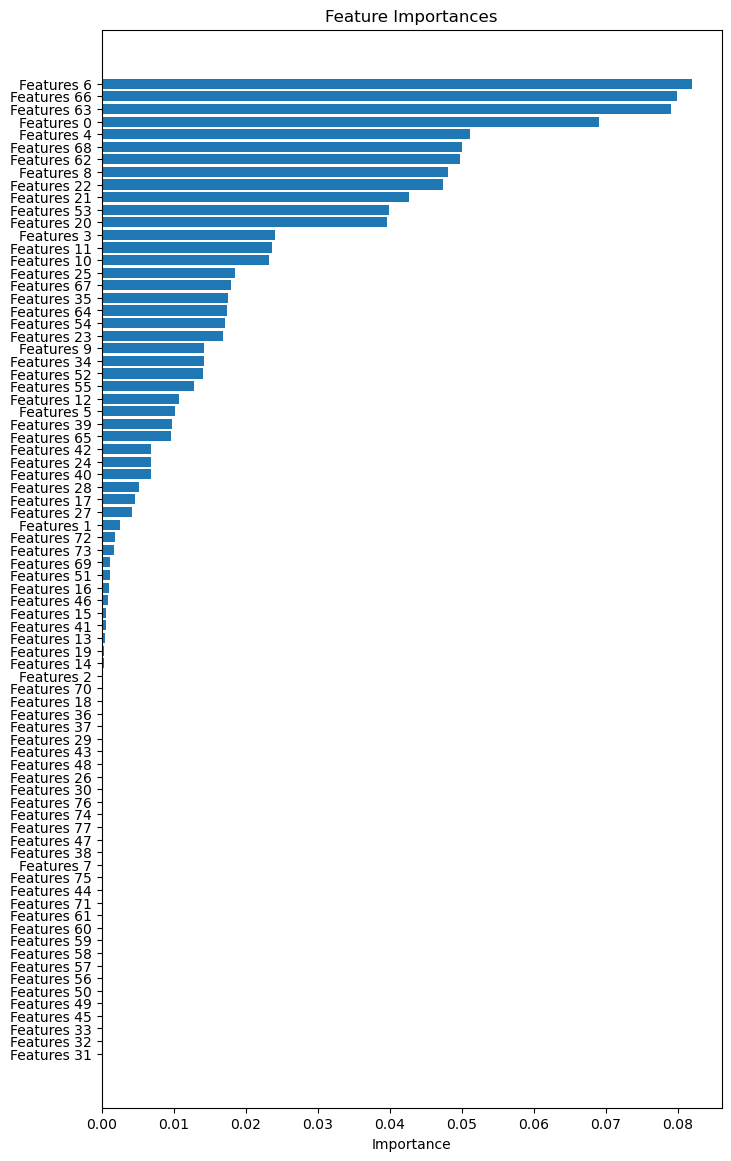

In [38]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()


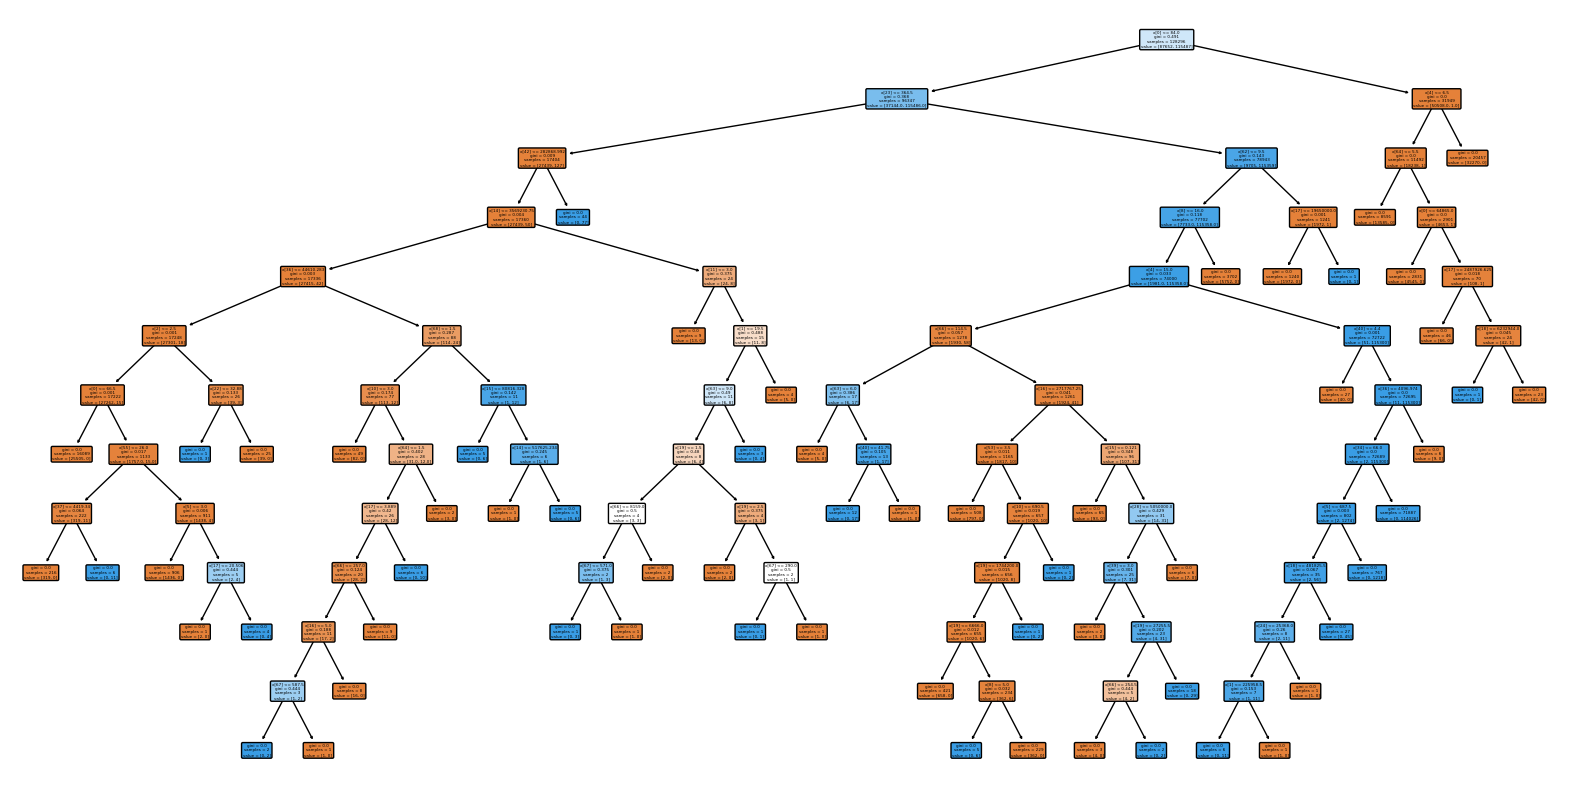

In [39]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

### Model Evaluation

In [139]:
pip install seaborn --upgrade


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 435.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 525.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 514.3 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 692.4 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/294.9 kB 749.3 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 759.1 kB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [43]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

In [44]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')



Random Forest Metrics:
Accuracy: 0.9999
F1 Score: 0.9999
Precision: 1.0000
Recall: 0.9998


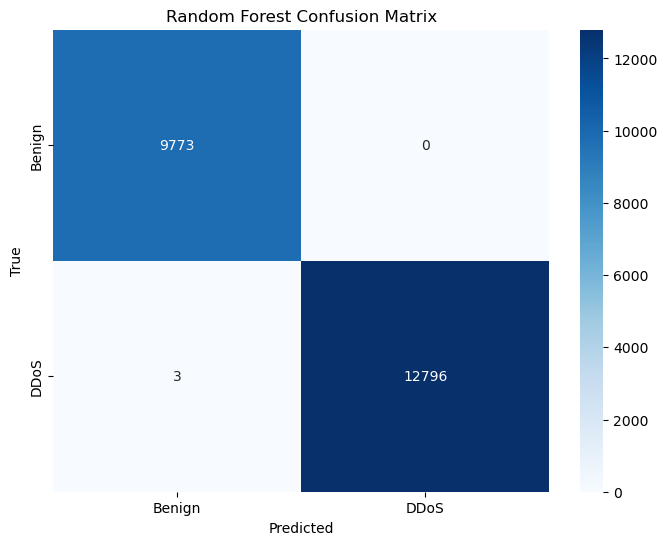

In [45]:
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

## logistic Regression

In [61]:
from sklearn.pipeline import make_pipeline

In [71]:
lr_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=500))
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [54]:
from sklearn.linear_model import SGDClassifier
# Standardize the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

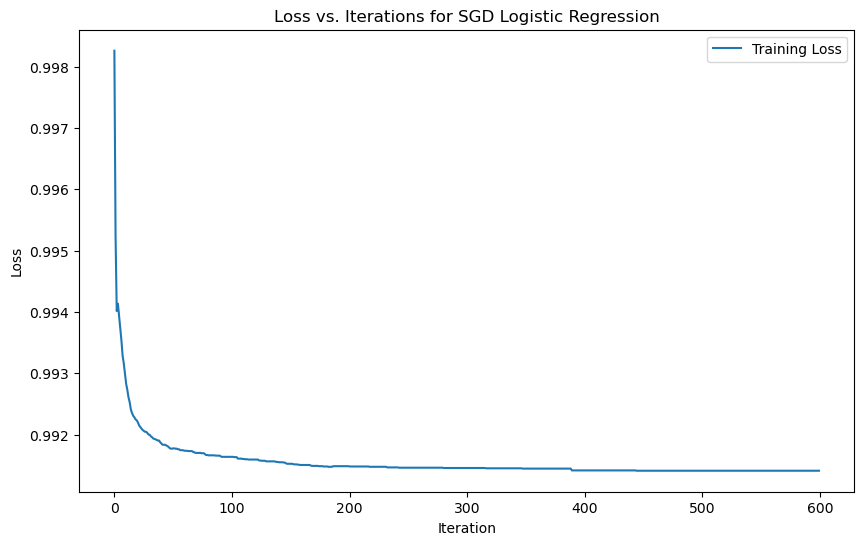

In [60]:
# Initialize the SGDClassifier with logistic loss
sgd = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42)

# Lists to store the loss values and iteration numbers
losses = []
iterations = 600  # Number of iterations for training

# Train the model using partial_fit
for i in range(iterations):
    sgd.partial_fit(X_train_s, y_train, classes=np.unique(y_train))
    loss = sgd.score(X_train_s, y_train)  # Use negative accuracy as a proxy for loss
    losses.append(loss)

# Plot the loss against iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for SGD Logistic Regression')
plt.legend()
plt.show()

In [72]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [73]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9981
F1 Score: 0.9983
Precision: 0.9987
Recall: 0.9979


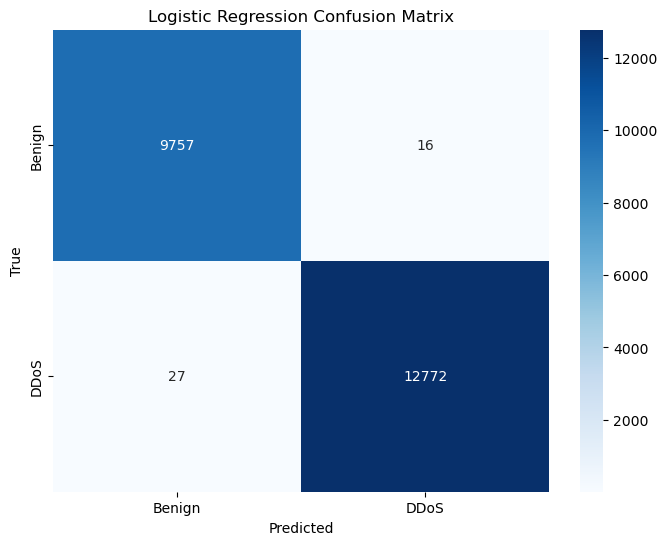

In [74]:
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')


## Neural Network

In [84]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=600, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

In [85]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9994
F1 Score: 0.9995
Precision: 0.9997
Recall: 0.9993


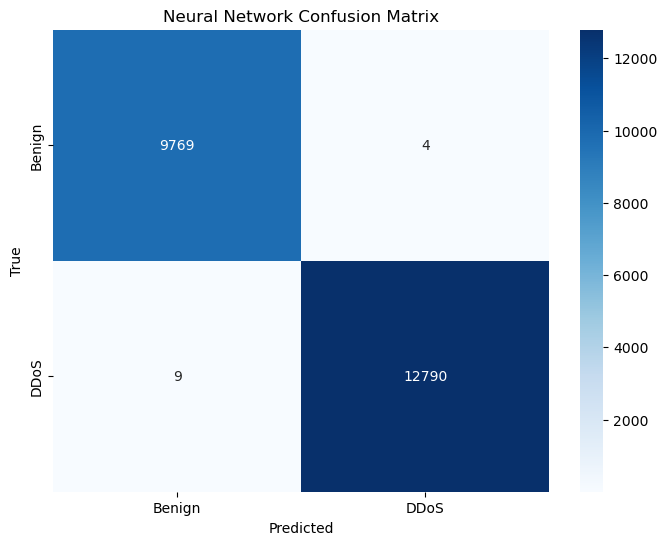

In [86]:
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# Standardize the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_s.shape[1],)),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_s, y_train, epochs=600, batch_size=32, validation_split=0.2, verbose=1)

# Predict
nn_pred = model.predict(X_test_s)
nn_pred = (nn_pred > 0.5).astype(int)  # Convert probabilities to class labels

Epoch 1/600
5079/5079 [==============================] - 17s 3ms/step - loss: 0.0309 - accuracy: 0.9921 - val_loss: 0.0062 - val_accuracy: 0.9992
Epoch 2/600
5079/5079 [==============================] - 16s 3ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 0.9991
Epoch 3/600
5079/5079 [==============================] - 16s 3ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 4/600
5079/5079 [==============================] - 17s 3ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 5/600
5079/5079 [==============================] - 16s 3ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 6/600
5079/5079 [==============================] - 16s 3ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 7/600
5079/5079 [==============================] - 15s 3ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0020 -

Epoch 57/600
5079/5079 [==============================] - 15s 3ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 58/600
5079/5079 [==============================] - 15s 3ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 59/600
5079/5079 [==============================] - 15s 3ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 60/600
5079/5079 [==============================] - 16s 3ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0038 - val_accuracy: 0.9996
Epoch 61/600
5079/5079 [==============================] - 15s 3ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 62/600
5079/5079 [==============================] - 15s 3ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 63/600
5079/5079 [==============================] - 471s 93ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss:

Epoch 112/600
5079/5079 [==============================] - 16s 3ms/step - loss: 9.0196e-04 - accuracy: 0.9998 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 113/600
5079/5079 [==============================] - 17s 3ms/step - loss: 8.2288e-04 - accuracy: 0.9998 - val_loss: 0.0021 - val_accuracy: 0.9997
Epoch 114/600
5079/5079 [==============================] - 17s 3ms/step - loss: 9.9428e-04 - accuracy: 0.9998 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 115/600
5079/5079 [==============================] - 16s 3ms/step - loss: 9.1721e-04 - accuracy: 0.9997 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 116/600
5079/5079 [==============================] - 15s 3ms/step - loss: 8.7437e-04 - accuracy: 0.9998 - val_loss: 0.0021 - val_accuracy: 0.9997
Epoch 117/600
5079/5079 [==============================] - 16s 3ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 118/600
5079/5079 [==============================] - 15s 3ms/step - loss: 8.8284e-04 -

5079/5079 [==============================] - 18s 4ms/step - loss: 8.0235e-04 - accuracy: 0.9998 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 167/600
5079/5079 [==============================] - 17s 3ms/step - loss: 8.0340e-04 - accuracy: 0.9998 - val_loss: 0.0031 - val_accuracy: 0.9996
Epoch 168/600
5079/5079 [==============================] - 17s 3ms/step - loss: 8.4879e-04 - accuracy: 0.9998 - val_loss: 0.0026 - val_accuracy: 0.9997
Epoch 169/600
5079/5079 [==============================] - 18s 4ms/step - loss: 7.3456e-04 - accuracy: 0.9998 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 170/600
5079/5079 [==============================] - 18s 3ms/step - loss: 8.1211e-04 - accuracy: 0.9998 - val_loss: 0.0022 - val_accuracy: 0.9996
Epoch 171/600
5079/5079 [==============================] - 16s 3ms/step - loss: 7.6824e-04 - accuracy: 0.9998 - val_loss: 0.0028 - val_accuracy: 0.9996
Epoch 172/600
5079/5079 [==============================] - 17s 3ms/step - loss: 8.0446e-04 - accuracy: